# MultiBinaryToMultiClass

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

## Generate some fake data

In [3]:
import numpy as np
Y = (np.random.random((1000, 5)) > 0.3).astype(int)
Y

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1],
       ...,
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 0, 1]])

## Convert Multi-Binary to Multi-Class

In [4]:
from seasalt import MultiBinaryToMultiClass

obj = MultiBinaryToMultiClass()
obj.fit(Y)
Y_class = obj.transform(Y)
Y_back = obj.inverse_transform(Y_class)

In [5]:
print(np.all(Y_back == Y))

True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113ec5a90>]],
      dtype=object)

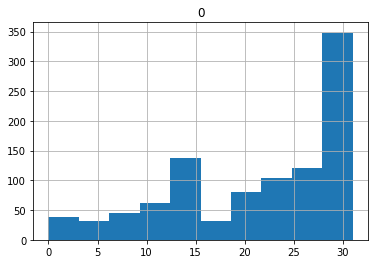

In [6]:
import pandas as pd
%matplotlib inline
pd.DataFrame(data=Y_class).hist()

In [7]:
from collections import Counter
print(Counter(Y_class))

Counter({31: 173, 15: 79, 29: 78, 23: 69, 30: 61, 27: 55, 11: 38, 26: 37, 28: 36, 14: 35, 19: 35, 21: 33, 7: 33, 25: 29, 22: 24, 13: 23, 3: 20, 12: 17, 6: 15, 17: 15, 18: 13, 20: 13, 5: 12, 24: 11, 1: 10, 10: 7, 8: 6, 9: 6, 0: 5, 2: 4, 4: 4, 16: 4})


In [8]:
from sklearn.utils import class_weight
class_weights = dict(enumerate(class_weight.compute_class_weight(
    'balanced', np.unique(Y_class), Y_class)))
print(class_weights)

{0: 6.25, 1: 3.125, 2: 7.8125, 3: 1.5625, 4: 7.8125, 5: 2.6041666666666665, 6: 2.0833333333333335, 7: 0.946969696969697, 8: 5.208333333333333, 9: 5.208333333333333, 10: 4.464285714285714, 11: 0.8223684210526315, 12: 1.838235294117647, 13: 1.358695652173913, 14: 0.8928571428571429, 15: 0.39556962025316456, 16: 7.8125, 17: 2.0833333333333335, 18: 2.4038461538461537, 19: 0.8928571428571429, 20: 2.4038461538461537, 21: 0.946969696969697, 22: 1.3020833333333333, 23: 0.4528985507246377, 24: 2.840909090909091, 25: 1.0775862068965518, 26: 0.8445945945945946, 27: 0.5681818181818182, 28: 0.8680555555555556, 29: 0.40064102564102566, 30: 0.5122950819672131, 31: 0.18063583815028902}
